# 1.画大图+小图

In [3]:
#skip=range(1,6000)
#n=1000
data=pd.read_csv('/media/richard/Backup Plus/314kpair_DR16_final_Z_0.4_v9.5.5_star_fo_in_pair.csv',chunksize=2,nrows=10)
mpl.rcParams['agg.path.chunksize']=100
mpl.rcParams['font.serif']='Times New Roman'
mpl.rc('font',family='Times New Roman')
w_all={'NeV]3426':[3425.9],'FeVII]3759':[3758.9],'FeV]3839':[3839.4],'ArXIV]4414':[4412.5],'FeVII]5160':[5159.0],'FeXIV]5304':[5302.9],'FeVI]5335':[5335.2],\
        'FeVI]5426':[5426.6],'Fe VII]5722':[5720.7],'FeVII]6087':[6087.0],'FeX]6375':[6374.5],'ArV]7006':[7005.8],'SXII]7612':[7611.0],'FeXI]7894':[7891.8]}
#w_all=pd.DataFrame(data=w_all)
win_length=[23,26,29,35,35,36,41,43,47,51,53]
for df in data:
    with PdfPages('/media/richard/Backup Plus/test0402/test0402_%s.pdf'%str(min(df.GroupID))) as pdf:
        for i in tqdm(df.index):
            if i!=min(df.index) and df.GroupID[i]==df.GroupID[i-1]:
                    continue
            cut=df.loc[df.GroupID==df.GroupID[i]]
            fig=plt.figure(figsize=(18,15),facecolor='white',frameon=False)
            j=0
            num=len(cut)
            #color_list=np.random.random([num,3])
            for m in cut.index:
                plt.title('GroupID=%s,GroupSize=%s,redshift=%s'%(df.GroupID[i],df.GroupSize[i],df.Z[i]),fontsize=6)
                alist=fits.open('/media/richard/Backup Plus/sdss_16_pair/%s'%str(cut.specname[m]))
                spectra=alist[1].data
                redshift=cut.Z[i]
                ind1 = np.where((spectra['and_mask'] ==0),True,False)#remove bad pixels which fluxes<0
                flux=spectra['flux'][ind1]+j*10
                lam_no_z=(10**spectra['loglam'])/(redshift+1)
                wave=lam_no_z[ind1]
                if cut.CL_5_COUNTS[m]>1:
                    color_spec='orange'
                else:color_spec='black'
                ##smoothing complete spectrum
                gauss_kernel=Gaussian1DKernel(1)
                real_f=interpolate_replace_nans(flux,gauss_kernel)
                real_f=convolve(real_f,gauss_kernel)
                peak=np.mean(real_f)+40
                #ploting
                ax2=fig.add_subplot(6,3,12)
                ind3=np.where((wave>=4900)&(wave<=5100))
                ax2.plot(wave[ind3],flux[ind3],color=color_spec,linewidth=1)
                plt.text([4959,5007],peak-4,r'$OIII]$',fontsize=10,color='black')
                plt.xlabel(r'$Wavelength (\AA)$',fontsize=10)
                plt.ylabel(r'$Flux$',fontsize=10)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                
                nu=1
                for ss in w_all:
                    ax1=fig.add_subplot(6,3,nu)
                    ind2=np.where((wave>(w_all[ss]-30))&(wave<(w_all[ss]+30)),True,False)
                    #ind2=np.where((wave>=np.rint(w_all[ss]-win_length[nu-1]/2))&(wave<=np.rint(w_all[ss]+win_length[nu-1]/2)),True,False)
                    ax1.plot(wave[ind2],flux[ind2],color=color_spec,linewidth=1)
                    linecenter=np.array([w_all[ss],w_all[ss]])
                    if len(cut[cut['STD%s'%ss[-4:]]>5])>0:
                        co='black'
                    else:
                        co='gray'
                    if m==max(cut.index):
                        ax1.plot(linecenter,[peak,peak-3],'-',color='red')
                        plt.text(np.rint(linecenter[0]),peak-4,r'$%s$'%ss,fontsize=10,color=co)
                        plt.ylim(0,peak+2)
                        plt.xlabel(r'$Wavelength (\AA)$',fontsize=10)
                        plt.ylabel(r'$Flux$',fontsize=10)
                        plt.xticks(fontsize=10)
                        plt.yticks(fontsize=10)
                    nu+=1
                #complete spectrum
                ax10=fig.add_subplot(6,3,(13,18))
                ax10.plot(lam_no_z,spectra['flux'],color='lightgray',linewidth=0.2,alpha=0.8)            
                ax10.plot(wave,real_f,color=color_spec,linewidth=0.3,alpha=0.9,label='%s'%str(cut.specname[m]))
                #set axis parameters
                plt.xlim(min(wave),max(wave))
                plt.ylim(0,peak)
                plt.xlabel(r'$Wavelength (\AA)$',fontsize=14)
                plt.ylabel(r'$Flux\ Counts$',fontsize=14)
                plt.xticks(fontsize=14)
                plt.yticks(fontsize=14)
                #text
                if m==max(cut.index):
                    for mm in w_all:
                        plt.axvline(x=w_all[mm],c='lightgray',ls='--',linewidth=0.1)
                        if len(cut[cut['STD%s'%ss[-4:]]>5])>0:
                            plt.text(np.rint(w_all[mm]),peak-10,r'$%s$'%mm,fontsize=8,rotation=90,color='red')
                        else:
                            plt.text(np.rint(w_all[mm]),peak-10,r'$%s$'%mm,fontsize=8,rotation=90,color='black')
                j+=1
                print(j)
            #hours = mdates.SecondLocator(bysecond=[0,30])
            #t_fmt = mdates.DateFormatter('%H:%M:%S')
            #plt.gca().xaxis.set_major_locator(hours)
            #plt.gca().xaxis.set_major_formatter(t_fmt)
            plt.legend(loc='upper right')
            plt.subplots_adjust(wspace=0.3,hspace=0.3)
            pdf.savefig(fig)
            plt.savefig('/media/richard/Backup Plus/test0402/%s.png'%str(df.GroupID[i]))
            #plt.show()
            plt.close()

NameError: name 'pd' is not defined

# 2. 画全光谱大图（eps+png）+CL小图+天光图+Firefly continuum fitting

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.convolution import convolve,Gaussian1DKernel,interpolate_replace_nans
from matplotlib.backends.backend_pdf import PdfPages
import sys
import warnings
import matplotlib.cbook
from tqdm import tqdm
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#import matplotlib.dates as mdates
#import io
sys.setrecursionlimit(1000000)
path='/media/richard/Backup Plus/sdss_16_pair/'
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
df=pd.read_csv('/media/richard/Backup Plus/314kpair_DR16_final_Z_0.4_v10.5_star_fo_in_pair_pairs4022.csv')
w_all={'NeV]3426':[3425.9],'FeVII]3759':[3758.9],'FeV]3839':[3839.4],'ArXIV]4414':[4412.5],'FeVII]5160':[5159.0],'FeXIV]5304':[5302.9],'FeVI]5335':[5335.2],\
        'FeVI]5426':[5426.6],'Fe VII]5722':[5720.7],'FeVII]6087':[6087.0],'FeX]6375':[6374.5],'ArV]7006':[7005.8],'SXII]7612':[7611.0],'FeXI]7894':[7891.8]}

In [5]:
%matplotlib inline
df=df[2878:]
#mpl.rcParams['agg.path.chunksize']=50
mpl.rcParams['font.serif']='Times New Roman'
mpl.rc('font',family='Times New Roman')
#for df in data:
for i in tqdm(df.index):
    if i!=min(df.index) and df.GroupID[i]==df.GroupID[i-1]:
        continue
    cut=df.loc[df.GroupID==df.GroupID[i]]
    fig=plt.subplots(nrows=9,ncols=5,facecolor='white',figsize=(6,10))
    plt.tight_layout(0.7)
    #num=len(cut)
    #color_list=np.random.random([num,3])
    color_list=['darkblue','steelblue','blueviolet']
    j=0
    m=0
    for m in cut.index:
        #read original fits
        alist=fits.open('/media/richard/Backup Plus/sdss_16_pair/%s'%str(cut.specname[m]))
        spectra=alist[1].data
        spectra_cha=alist[2].data
        fit_spec=alist[3].data
        redshift=cut.Z[i]
        z_err=spectra_cha.Z_ERR
        ind1 = np.where((spectra['and_mask'] ==0),True,False)#remove bad pixels
        flux=spectra['flux'][ind1]+j*15
        lam_no_z=(10**spectra['loglam'])/(redshift+1)
        wave=(10**spectra['loglam'][ind1])/(redshift+1)
        #read firefly fits
        if os.path.exists("/media/richard/Backup Plus/firefly_release/run/output/SpFly-%s"%cut.specname[m])==True:
            hdu=fits.open("/media/richard/Backup Plus/firefly_release/run/output/SpFly-%s"%cut.specname[m])
        else:print("%s does not exist"%cut.specname[m])
        da=hdu[1].data
        ##smoothing complete spectrum
        gauss_kernel=Gaussian1DKernel(1)
        real_f=interpolate_replace_nans(flux,gauss_kernel)
        if len(real_f)==0:
            print("failed:%s"%cut.specname[m])
            continue
        real_f=convolve(real_f,gauss_kernel)
        peak=np.mean(real_f)+15
        if len(flux[np.where(flux>peak)])>50:
            peak=np.max(real_f)
        ax10=plt.subplot(9,5,(1,20))
        if cut.CL_1_COUNTS[m]>1:
            cc='red'
        else:cc='orange'
        ax10.plot(lam_no_z,spectra['flux']+j*15,color='lightgray',linewidth=0.2,alpha=0.8)
        ax10.plot(da.wavelength,da.firefly_model+j*15,color=cc,linewidth=0.7,label='%s'%cut.specname[m])
        ax10.plot(wave,real_f,color='black',linewidth=0.2,alpha=0.9)
        ax20=plt.subplot(9,5,(21,30))
        ax20.plot(lam_no_z,spectra['sky']+j*10,color='purple',linewidth=0.2,alpha=0.9)
        #set axis parameters
        ax10.set_xlim(min(wave),max(wave))
        ax10.set_ylim(0,peak)
        ax20.set_xlim(min(wave),max(wave))
        ax20.set_ylim(0,300)
        ax10.tick_params(labelsize=5)
        ax20.tick_params(labelsize=5)
        ax10.set_title('GroupID=%s,GroupSize=%s,redshift=%s'%(df.GroupID[i],df.GroupSize[i],df.Z[i]),fontsize=6,loc='center')
        #text
        if m==max(cut.index):
            for ss in w_all:
                ax10.axvline(x=w_all[ss],c='blue',ls='--',linewidth=0.1,alpha=0.8)
                ax20.axvline(x=w_all[ss],c='blue',ls='--',linewidth=0.1,alpha=0.8)
                if len(cut[cut['STD%s'%ss[-4:]]>1])>0:
                    ax10.text(np.rint(w_all[ss]),peak-5,r'$%s$'%ss,fontsize=3,rotation=90,color='red')
                else:
                    ax10.text(np.rint(w_all[ss]),peak-5,r'$%s$'%ss,fontsize=3,rotation=90,color='black')
            ax10.axvline(x=fit_spec['LINEWAVE'][17],c='blue',ls='--',linewidth=0.1,alpha=0.9)
            ax10.text(5008,peak-5,r'$OIII]5007$',fontsize=4,rotation=90,color='blue')
            ax20.axvline(x=fit_spec['LINEWAVE'][17],c='blue',ls='--',linewidth=0.1,alpha=0.9)
            ax10.axvline(x=fit_spec['LINEWAVE'][24],c='blue',ls='--',linewidth=0.1,alpha=0.9)
            ax10.text(6565,peak-5,r'$Ha$',fontsize=5,rotation=90,color='blue')
            ax20.axvline(x=fit_spec['LINEWAVE'][24],c='blue',ls='--',linewidth=0.1,alpha=0.9)
            ax20.set_xlabel(r'$Wavelength (\AA)$',fontsize=4)
            ax10.set_ylabel(r'$Flux$',fontsize=6)
            ax10.set_xticks([])
        #small figures
        k=31
        for mm in w_all:
            ax_s=plt.subplot(9,5,k)
            MIN=float(np.float32(w_all[mm])-100)
            MAX=float(np.float32(w_all[mm])+100)
            ind2=np.where((wave>=MIN)&(wave<=MAX),True,False)
            ax_s.plot(wave[ind2],real_f[ind2],color='black',linewidth=0.5,alpha=1)
            ax_s.set_xlim(MIN,MAX)
            if m==max(cut.index):
                #ax_s.text(np.rint(w_all[mm]),peak-10,r'$%s$'%mm,fontsize=3,rotation=90,color='blue')
                if len(wave[ind2])!=0:
                    z_err_fit=max(cut.Z)-min(cut.Z)
                    lamba_1=((redshift+1)*np.float32(w_all[mm]))/(redshift+1+z_err+z_err_fit)
                    lamba_2=((redshift+1)*np.float32(w_all[mm]))/(redshift+1-z_err-z_err_fit)
                    x=[lamba_1,lamba_1,lamba_2,lamba_2]
                    y=[0,peak,peak,0]
                    ax_s.fill(x,y,facecolor='lightblue',alpha=0.7)
                ax_s.axvline(x=w_all[mm],c='gray',ls='--',linewidth=0.1,alpha=1)
                ax_s.set_ylim(0,peak-7)
            ax_s.tick_params(labelsize=5)
            k+=1
        ax_o=plt.subplot(9,5,45)
        ind3=np.where((wave>4900)&(wave<5050),True,False)
        ax_o.plot(wave[ind3],real_f[ind3],color='black',linewidth=0.5,alpha=1)
        ax_o.set_xlim(4900,5050)
        #if m==max(cut.index):
            #ax_o.axvline(x=5007,c='blue',ls='--',linewidth=0.1,alpha=0.8)
            #ax_o.text(np.rint(w_all[mm]),peak-10,r'$OIII]5007$',fontsize=5,rotation=90,color='blue')
        ax_o.set_ylim(0,peak)
        ax_o.tick_params(labelsize=3)                
        '''plt.axvline(x=4414,c='lightgray',ls='--',linewidth=0.6)
        plt.text(4414,peak-15,r'$[ArXIV]4414$',fontsize=8,rotation=90)

        plt.axvline(x=5304,c='lightgray',ls='--',linewidth=0.6)
        plt.text(5304,peak-15,r'$[FeXIV]5304$',fontsize=8,rotation=90)

        plt.axvline(x=5335,c='lightgray',ls='--',linewidth=0.6)
        plt.text(5335,peak-15,r'$[FeVI]5335$',fontsize=8,rotation=90)

        plt.axvline(x=5426,c='lightgray',ls='--',linewidth=0.6)
        plt.text(5426,peak-15,r'$[FeVI]5426$',fontsize=8,rotation=90)

        plt.axvline(x=6087,c='lightgray',ls='--',linewidth=0.6)
        plt.text(6087,peak-15,r'$[FeVII]6087$',fontsize=8,rotation=90)

        plt.axvline(x=6375,c='lightgray',ls='--',linewidth=0.6)
        plt.text(6375,peak-15,r'$[FeX&OI]6375$',fontsize=8,rotation=90)

        plt.axvline(x=3426,c='lightgray',ls='--',linewidth=0.6)
        plt.text(3426,peak-15,r'$[NeV]3426$',fontsize=8,rotation=90)

        plt.axvline(x=7006,c='lightgray',ls='--',linewidth=0.6)
        plt.text(7006,peak-15,r'$[ArV]7006$',fontsize=8,rotation=90)

        plt.axvline(x=7612,c='lightgray',ls='--',linewidth=0.6)
        plt.text(7612,peak-15,r'$[SXII]7612$',fontsize=8,rotation=90)

        plt.axvline(x=7894,c='lightgray',ls='--',linewidth=0.6)
        plt.text(7894,peak-15,r'$[FeXI]7894$',fontsize=8,rotation=90)
            '''
        j+=1
    #set subplots and legends
    ax10.legend(loc='upper left',fontsize=5)
    #ax20.legend(loc='upper left',fontsize=5)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)        
    plt.tick_params(labelsize=5)
    #plt.savefig('/media/richard/Backup Plus/test0402/whole/whole_%s.eps'%str(df.GroupID[i]))
    plt.savefig('/media/richard/Backup Plus/test04_con_15_cl_2/whole_%s.png'%str(df.GroupID[i]),dpi=300)
    plt.close()

  7%|▋         | 85/1144 [01:13<13:38,  1.29it/s]

failed:spec-0960-52466-0626.fits


 54%|█████▎    | 614/1144 [08:46<08:09,  1.08it/s]

spec-1379-53063-0107.fits does not exist


 54%|█████▍    | 616/1144 [08:48<07:40,  1.15it/s]

spec-1379-53063-0124.fits does not exist


 54%|█████▍    | 618/1144 [08:49<07:15,  1.21it/s]

spec-1379-53063-0233.fits does not exist


 54%|█████▍    | 620/1144 [08:51<07:00,  1.25it/s]

spec-1379-53063-0331.fits does not exist


 54%|█████▍    | 622/1144 [08:52<06:49,  1.27it/s]

spec-1379-53063-0348.fits does not exist


 55%|█████▍    | 624/1144 [08:54<06:36,  1.31it/s]

spec-1379-53063-0441.fits does not exist


 55%|█████▍    | 626/1144 [08:55<06:30,  1.33it/s]

spec-1379-53063-0447.fits does not exist


 55%|█████▍    | 628/1144 [08:56<06:29,  1.32it/s]

spec-1379-53063-0630.fits does not exist


 86%|████████▌ | 980/1144 [14:14<03:00,  1.10s/it]

failed:spec-2360-53728-0035.fits


100%|██████████| 1144/1144 [16:24<00:00,  1.16it/s]


In [17]:
lamba_2

array([7896.3765], dtype=float32)

# 3. 使用pPXF进行拟合(stellar population采用MILES数据)

mjd: 55975
redshift: 0.0035
flux normalized by: 246.88332
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[OII]3726' '[OII]3729' '[SII]6716'
 '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:         9        56     0.291     0.286
 comp.  1:        38        99    -0.013     0.012
 comp.  2:        29        99    -0.005     0.045
chi2/DOF: 9.014e-05; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 163; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 161
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1        Hdelta      4.037       23.      38    99
Comp:  1        Hgamma      5.434       19.      38    99
Comp:  1         Hbeta      13.91       16.      38    99
Comp:  1        Halpha      46.78       14.      38   

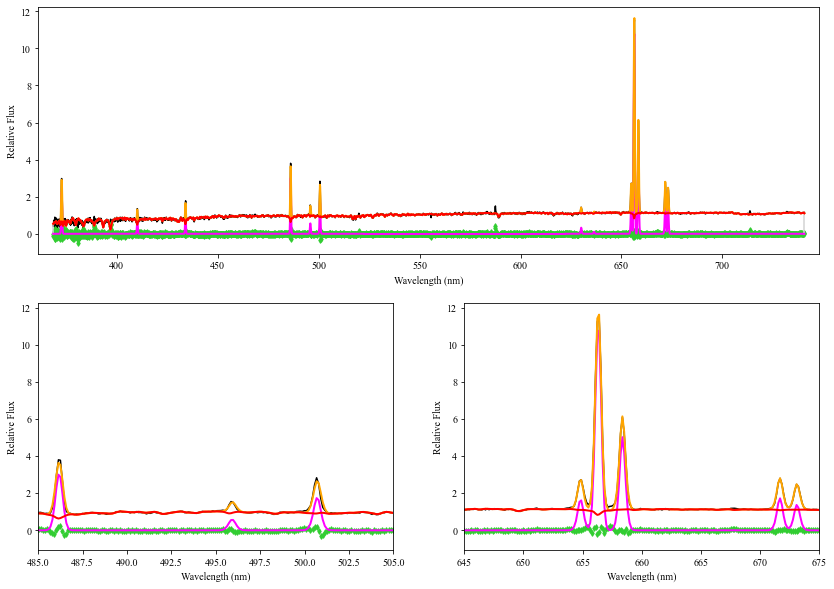

In [58]:
%matplotlib inline
# %load ppxf_example_population_gas_sdss.py
#!/usr/bin/env python
##############################################################################
#
# Usage example for the procedure PPXF, which implements the
# Penalized Pixel-Fitting (pPXF) method originally described in
# Cappellari M., & Emsellem E., 2004, PASP, 116, 138
#     http://adsabs.harvard.edu/abs/2004PASP..116..138C
# and upgraded in Cappellari M., 2017, MNRAS, 466, 798
#     http://adsabs.harvard.edu/abs/2017MNRAS.466..798C
#
# This example shows how to study stellar population and include gas emission
# lines as templates instead of masking them using the GOODPIXELS keyword.
#


##############################################################################



from astropy.cosmology import FlatLambdaCDM
from os import path
import glob, os
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import ppxf.miles_util as lib

##############################################################################
def flux2L(flux,z):
    """Transfer flux to luminoity assuming a flat Universe"""
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    DL = cosmo.luminosity_distance(z).value*10**6*3.08*10**18 # unit cm
    L = flux*1.e-17*4.*np.pi*DL**2   #erg/s/A
    return L

def L_conti(wave,flux,z):
    return np.asarray([np.log10(5100*flux2L(flux[np.where( abs(wave - 5100.) < 5.,True,False)].mean(),z) )])
    


tie_balmer=False
limit_doublets=False
ppxf_dir = path.dirname(path.realpath(ppxf_package.__file__))

# Read SDSS DR8 galaxy spectrum taken from here http://www.sdss3.org/dr8/
# The spectrum is *already* log rebinned by the SDSS DR8
# pipeline and log_rebin should not be used in this case.
#
#file = ppxf_dir + '/spectra/NGC3522_SDSS_DR8.fits'

mass_frac_all = np.array([])
ml_all = np.array([])
L_all = np.array([])
#for i in zip(glob.glob('/home/richard/spec-55976-F5597612_sp08-188.fits.gz'),\
                #range(10),['0805+2818a','0805+2818b','0907+5203a','0907+5203b',\
                    #'1058+3144a','1058+3144b','1330-0036a','1330-0036b','1544+0446a','1544+0446b']):
#for i in zip(glob.glob('/Users/legolason/study/otherwork/meicun/data/13b*.fits'),\
#            range(1),['1330-0036b']):

    #print '-------------------'+i[2]+'-------------------'
hdu = fits.open('/home/richard/spec-55976-F5597612_sp08-188.fits')
a = hdu[0].data
flux=a[0]
wv=a[2]/(1+hdu[0].header['Z'])
redshift=hdu[0].header['Z']
print ('mjd:',hdu[0].header['mjd'])
print ('redshift:',np.round(redshift,4))
    
wave1 =wv
flux1 = flux
err1 = 1./np.sqrt(a[1])
z = 0.

    # Only use the wavelength range in common between galaxy and stellar library.
    #
mask = np.where( (wave1 > 3541.) & (wave1 < 7409.) & (err1 <100.), True, False)

flux = flux1[mask]
galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
factor1=np.median(flux)
print ('flux normalized by:', np.median(flux))
wave = wave1[mask]
err = err1[mask]



    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
wave *= np.median(util.vac_to_air(wave)/wave)


    # The noise level is chosen to give Chi^2/DOF=1 without regularization (REGUL=0).
    # A constant noise is not a bad approximation in the fitted wavelength
    # range and reduces the noise in the fit.
    #
    #noise = np.full_like(galaxy, 0.01635)  # Assume constant noise per pixel here
noise = err*0.5

    # The velocity step was already chosen by the SDSS pipeline
    # and we convert it below to km/s
    #
c = 299792.458  # speed of light in km/s
velscale = c*np.log(wave[1]/wave[0])  # eq.(8) of Cappellari (2017)
FWHM_gal = 2.76  # SDSS has an approximate instrumental resolution FWHM of 2.76A.

    #------------------- Setup templates -----------------------

pathname = ppxf_dir + '/miles_models/Mun1.30*.fits'
miles = lib.miles(pathname, velscale, FWHM_gal)


    # The stellar templates are reshaped below into a 2-dim array with each
    # spectrum as a column, however we save the original array dimensions,
    # which are needed to specify the regularization dimensions
    #
reg_dim = miles.templates.shape[1:]
stars_templates = miles.templates.reshape(miles.templates.shape[0], -1)

    # See the pPXF documentation for the keyword REGUL,
regul_err = 0.01  # Desired regularization error

    # Construct a set of Gaussian emission line templates.
    # Estimate the wavelength fitted range in the rest frame.
    #
lam_range_gal = np.array([np.min(wave), np.max(wave)])/(1. + z)
gas_templates, gas_names, line_wave = util.emission_lines(
miles.log_lam_temp, lam_range_gal, FWHM_gal,
tie_balmer=tie_balmer, limit_doublets=limit_doublets)

    # Combines the stellar and gaseous templates into a single array.
    # During the PPXF fit they will be assigned a different kinematic
    # COMPONENT value
    #

templates = np.column_stack([stars_templates, gas_templates])

    #-----------------------------------------------------------

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below as described
    # in PPXF_EXAMPLE_KINEMATICS_SAURON and Sec.2.4 of Cappellari (2017)
    #
c = 299792.458
dv = c*(miles.log_lam_temp[0] - np.log(wave[0]))  # eq.(8) of Cappellari (2017)
vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017)
start = [vel, 180.]  # (km/s), starting guess for [V, sigma]

n_temps = stars_templates.shape[1]
n_forbidden = np.sum(["[" in a for a in gas_names])  # forbidden lines contain "[*]"
n_balmer = len(gas_names) - n_forbidden

    # Assign component=0 to the stellar templates, component=1 to the Balmer
    # gas emission lines templates and component=2 to the forbidden lines.
component = [0]*n_temps + [1]*n_balmer + [2]*n_forbidden
gas_component = np.array(component) > 0  # gas_component=True for gas templates

    # Fit (V, sig, h3, h4) moments=4 for the stars
    # and (V, sig) moments=2 for the two gas kinematic components
moments = [4, 4, 4]

    # Adopt the same starting value for the stars and the two gas components
start = [start, start, start]

    # If the Balmer lines are tied one should allow for gas reddeining.
    # The gas_reddening can be different from the stellar one, if both are fitted.
gas_reddening = 0 if tie_balmer else None

    # Here the actual fit starts.
    #
    # IMPORTANT: Ideally one would like not to use any polynomial in the fit
    # as the continuum shape contains important information on the population.
    # Unfortunately this is often not feasible, due to small calibration
    # uncertainties in the spectral shape. To avoid affecting the line strength of
    # the spectral features, we exclude additive polynomials (DEGREE=-1) and only use
    # multiplicative ones (MDEGREE=10). This is only recommended for population, not
    # for kinematic extraction, where additive polynomials are always recommended.
    #
pp = ppxf(templates, galaxy, noise, velscale, start,
              plot=False, moments=moments, degree=-1, mdegree=10, vsyst=dv,
              lam=wave, clean=False, regul=1./regul_err, reg_dim=reg_dim,
              component=component, gas_component=gas_component,
              gas_names=gas_names, gas_reddening=gas_reddening)

    # When the two Delta Chi^2 below are the same, the solution
    # is the smoothest consistent with the observed spectrum.
    #
print('Desired Delta Chi^2: %.4g' % np.sqrt(2*galaxy.size))
print('Current Delta Chi^2: %.4g' % ((pp.chi2 - 1)*galaxy.size))

weights = pp.weights[~gas_component]  # Exclude weights of the gas templates
weights = weights.reshape(reg_dim)/weights.sum()  # Normalized

miles.mean_age_metal(weights)
miles.mass_to_light(weights, band="r")

    # Plot fit results for stars and gas.
    #plt.clf()
#line=np.genfromtxt('/home/richard/study/otherwork/meicun/data_line/line_'+i[2]+'.txt')
plt.figure(figsize=(14,10))
ax1=plt.subplot(2,2,(1,2))
pp.plot()
#plt.text(0.05, 0.85,i[2], transform=ax1.transAxes,fontsize=15)

plt.subplot(2,2,3)
pp.plot()
plt.xlim(485,505)
plt.subplot(2,2,4)
pp.plot()
plt.xlim(645,675)


L = L_conti(wave,flux,redshift)
L_all = np.concatenate([L_all,L])
    
mass_frac_tmp = np.asarray([np.sum(weights[0:3,:])])
mass_frac_tmp_delta =np.asarray([np.sum(weights[0:4,:])-np.sum(weights[0:3,:] )]) 
mass_frac_all = np.concatenate([mass_frac_all,mass_frac_tmp])
    
ml_tmp = np.asarray([miles.mass_to_light(weights, band="r")])
ml_all = np.concatenate([ml_all,ml_tmp])
    
    #print L_tmp,mass_frac_all,ml_all
print('L r band (erg/s): %.4g' % L)
print( 'Log Stellar mass (solar mass)', 10**L/(3.8*10**33)/ml_tmp)
print('mass frac tion below 10^8 yr: %.4g' % (mass_frac_tmp))
print ('SFR (M_sun/yr): ', (10**L/(3.8*10**33)/ml_tmp*mass_frac_tmp/10**8))
print ('SFR_err: ', (10**L/(3.8*10**33)/ml_tmp*mass_frac_tmp_delta/10**8))
print('OIII/Ha:',)
    
    
#plt.savefig('/home/richard/spec-55976-F5597612_sp08-188.eps',dpi=300)

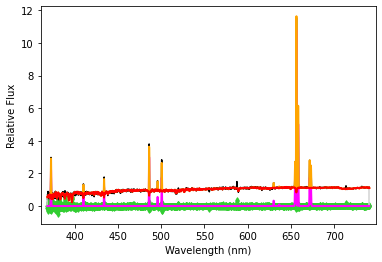